<h1><strong><u>Multi-layered Perceptron Model</u></strong></h1>

<h2><strong><u>Data Preparation</u></strong></h2>

In [2]:
%%capture
%run DataPreparation.ipynb

<h2><strong><u>MLP Model Selection</u></strong></h2>

<h3><strong><u>Validation Curves</u></strong></h3>

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END .clf__alpha=0.0001;, score=(train=1.000, test=0.951) total time= 1.6min
[CV] END .clf__alpha=0.0001;, score=(train=1.000, test=0.953) total time= 1.6min
[CV] END ......clf__alpha=1;, score=(train=0.958, test=0.934) total time= 1.7min
[CV] END ..clf__alpha=0.001;, score=(train=1.000, test=0.951) total time= 1.9min
[CV] END ....clf__alpha=0.1;, score=(train=0.999, test=0.950) total time= 2.0min
[CV] END ..clf__alpha=0.001;, score=(train=1.000, test=0.944) total time= 2.0min
[CV] END ...clf__alpha=0.01;, score=(train=1.000, test=0.947) total time= 2.2min
[CV] END ...clf__alpha=0.01;, score=(train=1.000, test=0.953) total time= 2.2min


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:  2.4min remaining:  5.1min


[CV] END ......clf__alpha=1;, score=(train=0.958, test=0.942) total time=  42.4s
[CV] END .clf__alpha=0.0001;, score=(train=1.000, test=0.954) total time=  47.8s
[CV] END ....clf__alpha=0.1;, score=(train=0.999, test=0.955) total time= 1.2min
[CV] END ......clf__alpha=1;, score=(train=0.956, test=0.939) total time=  51.8s
[CV] END .clf__alpha=0.0001;, score=(train=1.000, test=0.954) total time=  57.6s
[CV] END ..clf__alpha=0.001;, score=(train=1.000, test=0.948) total time= 1.4min
[CV] END ....clf__alpha=0.1;, score=(train=0.999, test=0.952) total time= 1.5min
[CV] END ...clf__alpha=0.01;, score=(train=1.000, test=0.948) total time= 1.7min
[CV] END ..clf__alpha=0.001;, score=(train=1.000, test=0.949) total time= 1.7min


[Parallel(n_jobs=-1)]: Done  17 out of  25 | elapsed:  4.6min remaining:  2.2min


[CV] END ......clf__alpha=1;, score=(train=0.959, test=0.943) total time= 1.1min
[CV] END .clf__alpha=0.0001;, score=(train=1.000, test=0.951) total time= 1.0min
[CV] END ...clf__alpha=0.01;, score=(train=1.000, test=0.950) total time= 1.8min
[CV] END ....clf__alpha=0.1;, score=(train=0.999, test=0.956) total time= 1.6min
[CV] END ..clf__alpha=0.001;, score=(train=1.000, test=0.946) total time= 1.4min
[CV] END ......clf__alpha=1;, score=(train=0.957, test=0.931) total time=  39.2s
[CV] END ....clf__alpha=0.1;, score=(train=0.999, test=0.950) total time= 1.2min
[CV] END ...clf__alpha=0.01;, score=(train=1.000, test=0.948) total time= 1.5min


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  5.5min finished


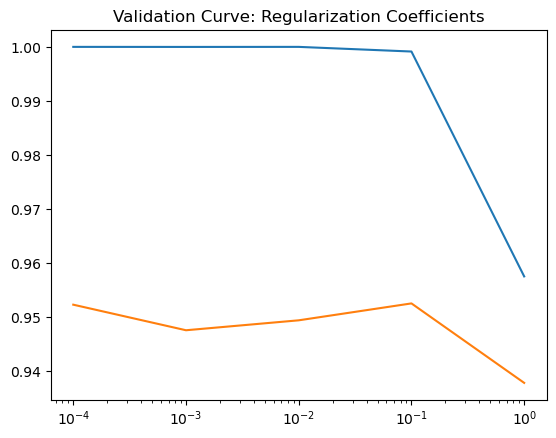

In [7]:
# Validation Curve for Testing Regularization Coefficient Ranges

pipeline = Pipeline(
    [
        ("vect", TfidfVectorizer(tokenizer=custom_tokenizer, token_pattern=None)),
        ("clf", MLPClassifier(hidden_layer_sizes=(10,))),
    ]
)
alphas = [0.0001, 0.001, 0.01, 0.1, 1]
train_scores, validation_scores = validation_curve(pipeline, X_train, y_train, cv=5, scoring='accuracy',
                                                   param_name="clf__alpha",
                                                   param_range=alphas,
                                                   verbose=3,
                                                   n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.title("Validation Curve: Regularization Coefficients")
plt.semilogx(alphas, train_scores_mean)
plt.semilogx(alphas, validation_scores_mean)

<h4><u>Findings From 'Regularization Coefficient Ranges' Validation Curve</u></h4>
From 0.1 to 1, the plot shows the starting point of the convergence of the training and the validation scores. Their convergence can point to the regularization coefficient that promotes the most generalized model. I will test further by shifting and expanding the range to 1-10.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END ......clf__alpha=7;, score=(train=0.500, test=0.500) total time=  36.0s
[CV] END ......clf__alpha=8;, score=(train=0.500, test=0.500) total time=  36.5s
[CV] END ......clf__alpha=6;, score=(train=0.500, test=0.500) total time=  37.2s
[CV] END ......clf__alpha=5;, score=(train=0.743, test=0.755) total time=  42.7s
[CV] END ......clf__alpha=4;, score=(train=0.816, test=0.822) total time=  43.6s
[CV] END ......clf__alpha=2;, score=(train=0.934, test=0.921) total time=  45.8s
[CV] END ......clf__alpha=3;, score=(train=0.893, test=0.889) total time=  52.7s
[CV] END ......clf__alpha=9;, score=(train=0.500, test=0.500) total time=  28.1s
[CV] END ......clf__alpha=1;, score=(train=0.959, test=0.935) total time= 1.2min
[CV] END .....clf__alpha=10;, score=(train=0.500, test=0.500) total time=  31.2s
[CV] END ......clf__alpha=4;, score=(train=0.806, test=0.819) total time=  34.9s
[CV] END ......clf__alpha=3;, score=(train=0.890, test=0.898) total time=  41.2s
[CV] END ......clf__alpha=5;

[Parallel(n_jobs=-1)]: Done  17 out of  50 | elapsed:  2.0min remaining:  4.0min


[CV] END ......clf__alpha=8;, score=(train=0.500, test=0.500) total time=  36.1s
[CV] END ......clf__alpha=9;, score=(train=0.500, test=0.500) total time=  27.4s
[CV] END .....clf__alpha=10;, score=(train=0.500, test=0.500) total time=  32.6s
[CV] END ......clf__alpha=4;, score=(train=0.626, test=0.636) total time=  28.1s
[CV] END ......clf__alpha=3;, score=(train=0.907, test=0.895) total time=  37.2s
[CV] END ......clf__alpha=1;, score=(train=0.955, test=0.938) total time=  50.9s
[CV] END ......clf__alpha=2;, score=(train=0.929, test=0.915) total time=  45.6s
[CV] END ......clf__alpha=5;, score=(train=0.500, test=0.500) total time=  32.3s
[CV] END ......clf__alpha=6;, score=(train=0.500, test=0.500) total time=  29.6s
[CV] END ......clf__alpha=7;, score=(train=0.500, test=0.500) total time=  37.0s
[CV] END ......clf__alpha=8;, score=(train=0.500, test=0.500) total time=  29.2s
[CV] END ......clf__alpha=9;, score=(train=0.500, test=0.500) total time=  28.6s
[CV] END .....clf__alpha=10;

[Parallel(n_jobs=-1)]: Done  34 out of  50 | elapsed:  3.6min remaining:  1.7min


[CV] END ......clf__alpha=1;, score=(train=0.961, test=0.945) total time=  51.7s
[CV] END ......clf__alpha=5;, score=(train=0.500, test=0.500) total time=  34.1s
[CV] END ......clf__alpha=7;, score=(train=0.500, test=0.500) total time=  27.2s
[CV] END ......clf__alpha=8;, score=(train=0.500, test=0.500) total time=  27.7s
[CV] END .....clf__alpha=10;, score=(train=0.500, test=0.500) total time=  28.0s
[CV] END ......clf__alpha=9;, score=(train=0.500, test=0.500) total time=  30.3s
[CV] END ......clf__alpha=4;, score=(train=0.877, test=0.868) total time=  34.2s
[CV] END ......clf__alpha=5;, score=(train=0.500, test=0.500) total time=  30.6s
[CV] END ......clf__alpha=3;, score=(train=0.902, test=0.890) total time=  41.2s
[CV] END ......clf__alpha=6;, score=(train=0.500, test=0.500) total time=  34.8s
[CV] END ......clf__alpha=2;, score=(train=0.937, test=0.923) total time=  50.9s
[CV] END ......clf__alpha=1;, score=(train=0.957, test=0.932) total time=  60.0s
[CV] END ......clf__alpha=8;

[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.8min finished


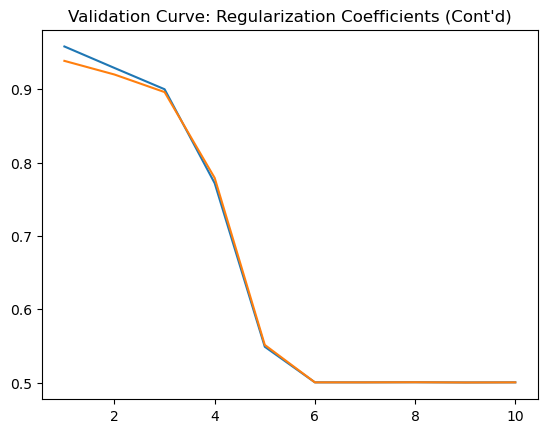

In [8]:
# Validation Curve for Testing Regularization Coefficient Ranges (Cont'd)

pipeline = Pipeline(
    [
        ("vect", TfidfVectorizer(tokenizer=custom_tokenizer, token_pattern=None)),
        ("clf", MLPClassifier(hidden_layer_sizes=(10,))),
    ]
)

alphas = list(range(1,11))
train_scores, validation_scores = validation_curve(pipeline, X_train, y_train, cv=5, scoring='accuracy',
                                                   param_name="clf__alpha",
                                                   param_range=alphas,
                                                   verbose=3,
                                                   n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.title("Validation Curve: Regularization Coefficients (Cont'd)")
plt.plot(alphas, train_scores_mean)
plt.plot(alphas, validation_scores_mean)

<h4><u>Findings From 'Regularization Coefficient Ranges (Cont'd)' Validation Curve</u></h4>
This plot suggests that a regularization coefficient between 1-3 is the best range for the generalization of the model. Regularization coefficients past three decrease both scores in unison.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END clf__hidden_layer_sizes=(4,);, score=(train=0.956, test=0.933) total time=  23.0s
[CV] END clf__hidden_layer_sizes=(4,);, score=(train=0.957, test=0.941) total time=  26.7s
[CV] END clf__hidden_layer_sizes=(8,);, score=(train=0.956, test=0.935) total time=  36.5s
[CV] END clf__hidden_layer_sizes=(8,);, score=(train=0.956, test=0.941) total time=  38.0s
[CV] END clf__hidden_layer_sizes=(12,);, score=(train=0.958, test=0.935) total time= 1.1min
[CV] END clf__hidden_layer_sizes=(16,);, score=(train=0.957, test=0.935) total time= 1.3min
[CV] END clf__hidden_layer_sizes=(20,);, score=(train=0.958, test=0.934) total time= 1.8min
[CV] END clf__hidden_layer_sizes=(12,);, score=(train=0.957, test=0.941) total time= 1.3min
[CV] END clf__hidden_layer_sizes=(4,);, score=(train=0.957, test=0.938) total time=  35.2s


[Parallel(n_jobs=-1)]: Done   9 out of  30 | elapsed:  2.0min remaining:  4.7min


[CV] END clf__hidden_layer_sizes=(16,);, score=(train=0.958, test=0.941) total time= 1.5min
[CV] END clf__hidden_layer_sizes=(8,);, score=(train=0.956, test=0.939) total time=  43.9s
[CV] END clf__hidden_layer_sizes=(24,);, score=(train=0.954, test=0.932) total time= 2.3min
[CV] END clf__hidden_layer_sizes=(20,);, score=(train=0.959, test=0.943) total time= 1.8min
[CV] END clf__hidden_layer_sizes=(4,);, score=(train=0.959, test=0.944) total time=  24.7s
[CV] END clf__hidden_layer_sizes=(24,);, score=(train=0.956, test=0.940) total time= 2.3min
[CV] END clf__hidden_layer_sizes=(8,);, score=(train=0.962, test=0.946) total time=  46.3s
[CV] END clf__hidden_layer_sizes=(12,);, score=(train=0.956, test=0.936) total time= 1.4min
[CV] END clf__hidden_layer_sizes=(16,);, score=(train=0.957, test=0.937) total time= 1.7min
[CV] END clf__hidden_layer_sizes=(20,);, score=(train=0.959, test=0.940) total time= 1.8min
[CV] END clf__hidden_layer_sizes=(12,);, score=(train=0.954, test=0.939) total time

[Parallel(n_jobs=-1)]: Done  20 out of  30 | elapsed:  3.9min remaining:  2.0min


[CV] END clf__hidden_layer_sizes=(4,);, score=(train=0.958, test=0.932) total time=  30.0s
[CV] END clf__hidden_layer_sizes=(24,);, score=(train=0.955, test=0.937) total time= 2.1min
[CV] END clf__hidden_layer_sizes=(16,);, score=(train=0.953, test=0.938) total time= 1.4min
[CV] END clf__hidden_layer_sizes=(8,);, score=(train=0.958, test=0.933) total time=  39.8s
[CV] END clf__hidden_layer_sizes=(20,);, score=(train=0.958, test=0.944) total time= 1.5min
[CV] END clf__hidden_layer_sizes=(12,);, score=(train=0.956, test=0.932) total time= 1.1min
[CV] END clf__hidden_layer_sizes=(24,);, score=(train=0.959, test=0.944) total time= 2.0min
[CV] END clf__hidden_layer_sizes=(16,);, score=(train=0.958, test=0.933) total time= 1.4min
[CV] END clf__hidden_layer_sizes=(20,);, score=(train=0.959, test=0.933) total time= 1.4min
[CV] END clf__hidden_layer_sizes=(24,);, score=(train=0.961, test=0.935) total time= 1.3min


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.9min finished


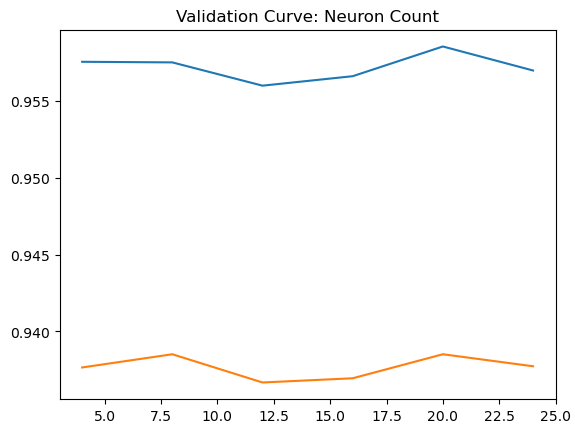

In [9]:
# Validation Curve for Testing Effect of Neuron Count

pipeline = Pipeline(
    [
        ("vect", TfidfVectorizer(tokenizer=custom_tokenizer, token_pattern=None)),
        ("clf", MLPClassifier(alpha=1)),
    ]
)

hidden_layers = [(4,), (8,), (12,), (16,), (20,), (24,)]
neurons = list(range(4, 25, 4))
train_scores, validation_scores = validation_curve(pipeline, X_train, y_train, cv=5, scoring='accuracy',
                                                   param_name="clf__hidden_layer_sizes",
                                                   param_range=hidden_layers,
                                                   verbose=3,
                                                   n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.title("Validation Curve: Neuron Count")
plt.plot(neurons, train_scores_mean)
plt.plot(neurons, validation_scores_mean)

<h4><u>Findings From 'Neuron Count' Validation Curve</u></h4>
The general shape of this plot suggests that regardless of the number of neurons the accuracy of both train and validation scores will remain proportional to each other. I believe this is due to the alphas value of 1 for the model. I believe these are good results and can be used in the GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END clf__hidden_layer_sizes=(14,);, score=(train=0.959, test=0.935) total time= 1.4min
[CV] END clf__hidden_layer_sizes=(14,);, score=(train=0.958, test=0.942) total time= 1.6min
[CV] END clf__hidden_layer_sizes=(14, 5);, score=(train=0.995, test=0.950) total time= 3.2min
[CV] END clf__hidden_layer_sizes=(14, 2);, score=(train=0.996, test=0.947) total time= 3.2min
[CV] END clf__hidden_layer_sizes=(14, 3);, score=(train=0.996, test=0.955) total time= 3.4min
[CV] END clf__hidden_layer_sizes=(14, 3);, score=(train=0.996, test=0.948) total time= 4.2min
[CV] END clf__hidden_layer_sizes=(14,);, score=(train=0.961, test=0.941) total time= 1.2min
[CV] END clf__hidden_layer_sizes=(14, 2);, score=(train=0.996, test=0.955) total time= 5.0min


[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:  5.1min remaining: 10.8min


[CV] END clf__hidden_layer_sizes=(14, 2);, score=(train=0.996, test=0.951) total time= 1.9min
[CV] END clf__hidden_layer_sizes=(14, 4);, score=(train=0.996, test=0.949) total time= 5.6min
[CV] END clf__hidden_layer_sizes=(14, 2);, score=(train=0.500, test=0.500) total time=  49.4s
[CV] END clf__hidden_layer_sizes=(14,);, score=(train=0.957, test=0.944) total time= 1.2min
[CV] END clf__hidden_layer_sizes=(14, 5);, score=(train=0.997, test=0.953) total time= 1.8min
[CV] END clf__hidden_layer_sizes=(14, 4);, score=(train=0.996, test=0.953) total time= 2.7min
[CV] END clf__hidden_layer_sizes=(14, 5);, score=(train=0.996, test=0.955) total time=15.9min
[CV] END clf__hidden_layer_sizes=(14, 2);, score=(train=0.500, test=0.500) total time=24.8min
[CV] END clf__hidden_layer_sizes=(14,);, score=(train=0.957, test=0.932) total time=25.3min


[Parallel(n_jobs=-1)]: Done  17 out of  25 | elapsed: 32.0min remaining: 15.1min


[CV] END clf__hidden_layer_sizes=(14, 4);, score=(train=0.996, test=0.955) total time=30.7min
[CV] END clf__hidden_layer_sizes=(14, 3);, score=(train=0.996, test=0.954) total time=76.1min


Exception ignored in: <function ResourceTracker.__del__ at 0x107129bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END clf__hidden_layer_sizes=(14, 3);, score=(train=0.996, test=0.952) total time=94.0min


Exception ignored in: <function ResourceTracker.__del__ at 0x1032c5bc0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes


[CV] END clf__hidden_layer_sizes=(14, 4);, score=(train=0.996, test=0.954) total time=106.1min
[CV] END clf__hidden_layer_sizes=(14, 5);, score=(train=0.996, test=0.953) total time=80.8min
[CV] END clf__hidden_layer_sizes=(14, 4);, score=(train=0.996, test=0.951) total time=81.0min
[CV] END clf__hidden_layer_sizes=(14, 3);, score=(train=0.995, test=0.951) total time=95.7min
[CV] END clf__hidden_layer_sizes=(14, 5);, score=(train=0.996, test=0.956) total time=107.7min


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 114.1min finished


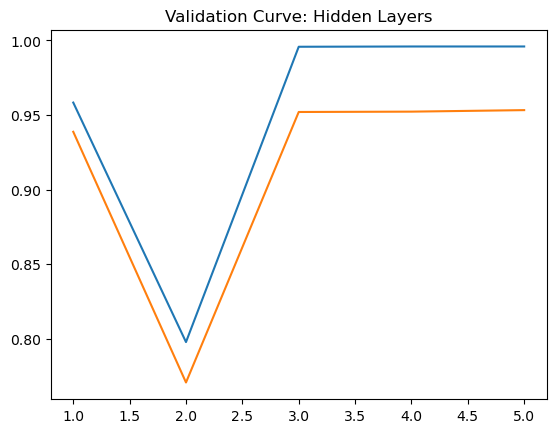

In [10]:
# Validation Curve for Testing Effect of Adding Hidden Layers

pipeline = Pipeline(
    [
        ("vect", TfidfVectorizer(tokenizer=custom_tokenizer, token_pattern=None)),
        ("clf", MLPClassifier(alpha=1, max_iter=500)),
    ]
)

hidden_layers_sizes = [(14,), (14,2), (14,3), (14,4), (14,5)]
hidden_layers = list(range(1,6))
train_scores, validation_scores = validation_curve(pipeline, X_train, y_train, cv=5, scoring='accuracy',
                                                   param_name="clf__hidden_layer_sizes",
                                                   param_range=hidden_layers_sizes,
                                                   verbose=3,
                                                   n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.title("Validation Curve: Hidden Layers")
plt.plot(hidden_layers, train_scores_mean)
plt.plot(hidden_layers, validation_scores_mean)

<h4><u>Findings From 'Hidden Layers' Validation Curve</u></h4>
The shape of this plot suggest that adding hidden layers to the MLPClassifier object does not improve the generalization of the model. Two hidden layer makes the train score shoot up to 1 while barely increasing the validation score which suggest overfitting. From three hidden layers and beyond, both the training and the validation scores are completely parallel to each other which suggests that the generalization will remain the same at that point. Therefore, adding another hidden layer will have a detrimental effect on the generalization of the MLPClassifier.

<h3><strong><u>Cross Validation Testing</u></strong></h3>

In [ ]:
pipeline = Pipeline(
    [
        ("vect", TfidfVectorizer(tokenizer=custom_tokenizer, token_pattern=None)),
        ("clf", MLPClassifier(alpha=1, max_iter=1000)),
    ]
)
param_grid = {
    "clf__hidden_layer_sizes": [(12,), (14,), (16,), (18,), (20,)]
    }

model = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=3)
model.fit(X_train, y_train)
mlp_classifier = model.best_estimator_
model.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 2/5] END clf__alpha=1, clf__hidden_layer_sizes=(2,);, score=0.941 total time=   9.2s
[CV 1/5] END clf__alpha=1, clf__hidden_layer_sizes=(2,);, score=0.935 total time=   9.6s
[CV 5/5] END clf__alpha=1, clf__hidden_layer_sizes=(2,);, score=0.931 total time=   9.3s
[CV 4/5] END clf__alpha=1, clf__hidden_layer_sizes=(2,);, score=0.943 total time=  10.7s
[CV 1/5] END clf__alpha=1, clf__hidden_layer_sizes=(4,);, score=0.933 total time=  11.5s
[CV 3/5] END clf__alpha=1, clf__hidden_layer_sizes=(2,);, score=0.939 total time=  11.8s
[CV 2/5] END clf__alpha=1, clf__hidden_layer_sizes=(4,);, score=0.941 total time=  11.8s
[CV 3/5] END clf__alpha=1, clf__hidden_layer_sizes=(4,);, score=0.938 total time=  12.3s
[CV 4/5] END clf__alpha=1, clf__hidden_layer_sizes=(4,);, score=0.941 total time=  12.2s
[CV 5/5] END clf__alpha=1, clf__hidden_layer_sizes=(4,);, score=0.935 total time=  12.6s
[CV 1/5] END clf__alpha=1, clf__hidden_layer_siz

{'clf__alpha': 1, 'clf__hidden_layer_sizes': (20,)}

<h4><strong><u>Findings From 'Model Selection' Section</u></strong></h4>
The parameters that were of interest in validation curve tests were hidden layer sizes and the regularization coefficient. After investigating all of the validation curves, I found that the sweet spot for generalization was at a low neuron count with a single layer and a regularization coefficient between 1-3. Using these finding in the Grid Search test, the resulting model parameters were hidden_layer_size=(20,) and alpha=1.

<h2><strong><u>Model Evaluation</u></strong></h2>

<h3><strong><u>Learning Curve</u></strong></h4>

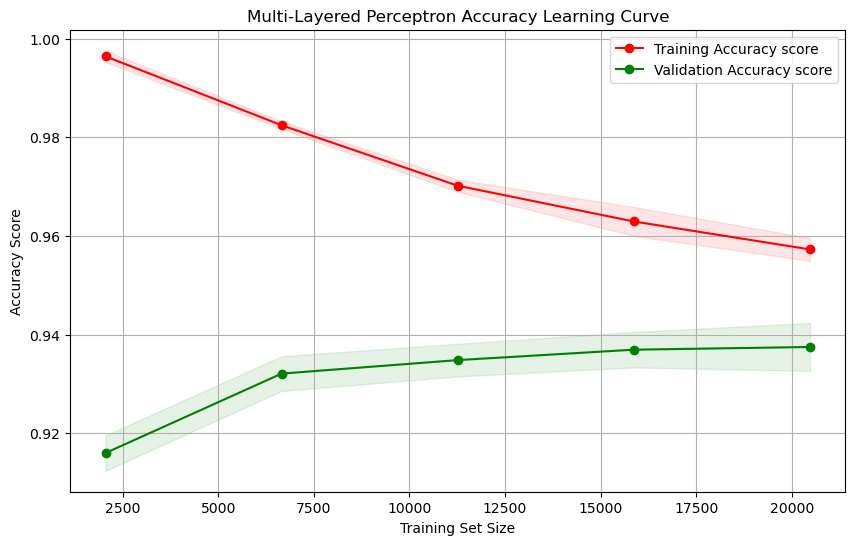

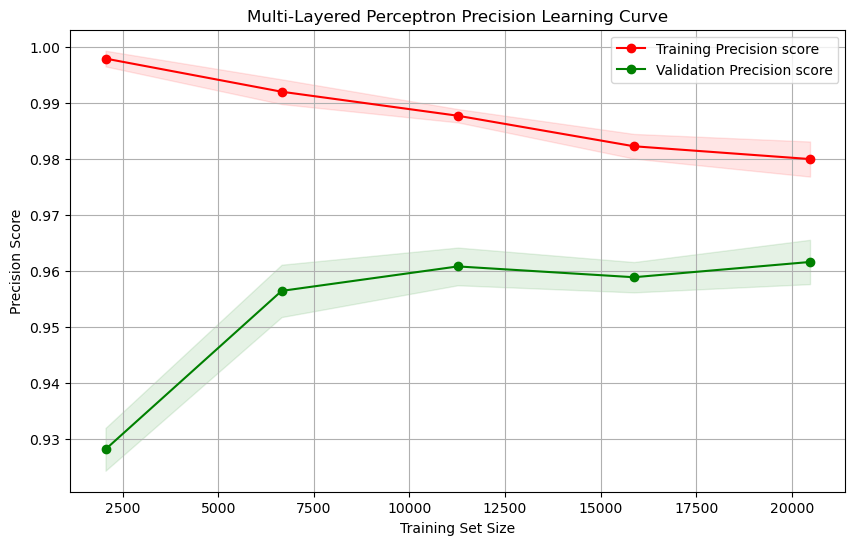

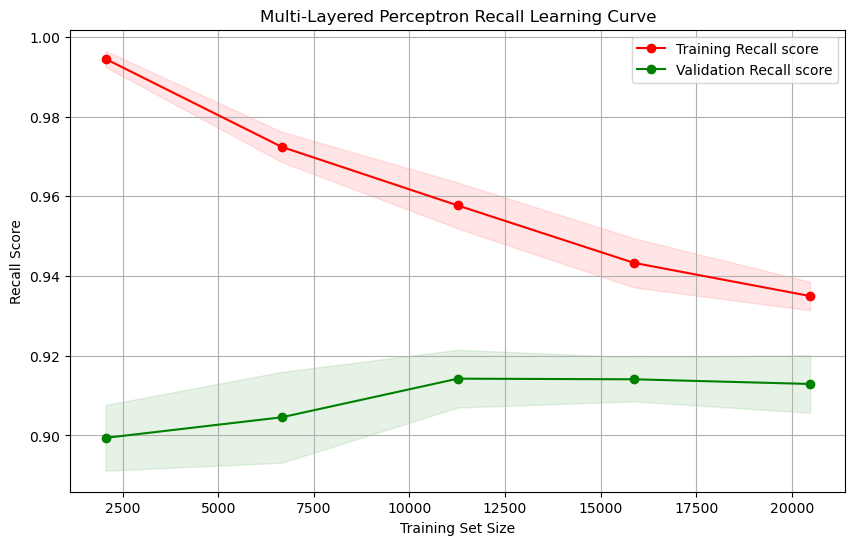

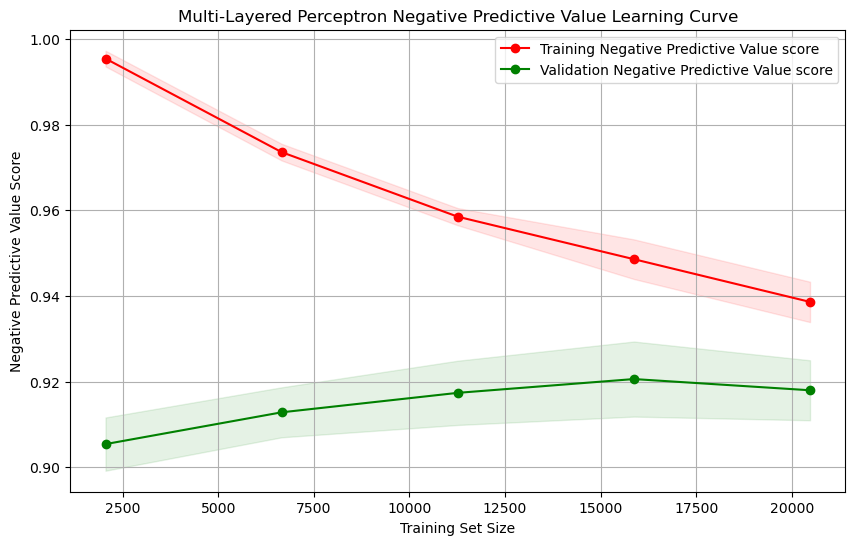

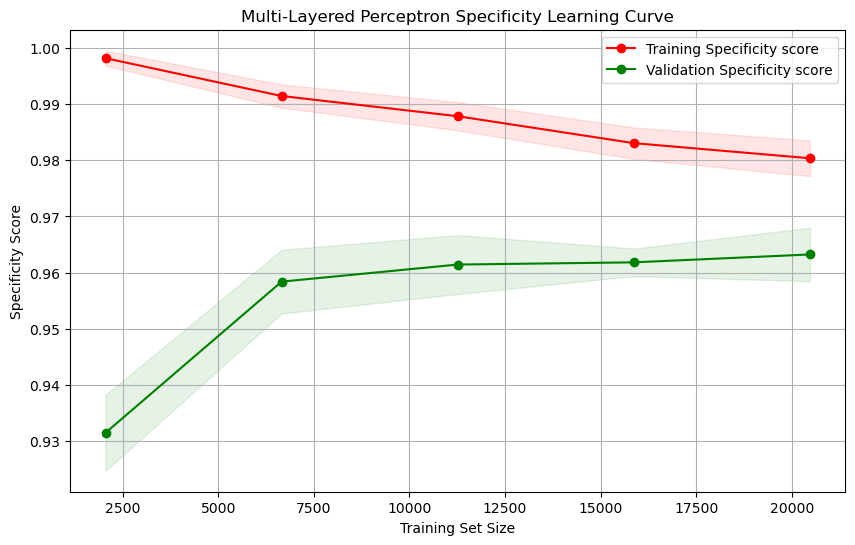

In [4]:
for key, value in clf_metrics.items():
    mlp_train_sizes, mlp_train_scores, mlp_validation_scores = learning_curve(
        mlp_classifier,
        X_train,
        y_train,
        cv=5,  # Number of folds for cross-validation
        scoring=value,  # Metric to evaluate the model
        n_jobs=-1,  # Use all available CPU cores
    )

    # Calculate mean and standard deviation for scores
    mlp_train_scores_mean = np.mean(mlp_train_scores, axis=1)
    mlp_train_scores_std = np.std(mlp_train_scores, axis=1)
    mlp_validation_scores_mean = np.mean(mlp_validation_scores, axis=1)
    mlp_validation_scores_std = np.std(mlp_validation_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.title(f"Multi-Layered Perceptron {key} Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel(f"{key} Score")
    plt.grid()

    plt.fill_between(mlp_train_sizes, mlp_train_scores_mean - mlp_train_scores_std,
                    mlp_train_scores_mean + mlp_train_scores_std, alpha=0.1, color="r")
    plt.fill_between(mlp_train_sizes, mlp_validation_scores_mean - mlp_validation_scores_std,
                    mlp_validation_scores_mean + mlp_validation_scores_std, alpha=0.1, color="g")
    plt.plot(mlp_train_sizes, mlp_train_scores_mean, 'o-', color="r",
                label=(f"Training {key} score"))
    plt.plot(mlp_train_sizes, mlp_validation_scores_mean, 'o-', color="g",
                label=(f"Validation {key} score"))

    plt.legend(loc="best")
    plt.show()

<h3><strong><u>Evaluation Metrics</u></strong></h3>

In [ ]:
for key, value in clf_metrics.items():
    print(f"{key}")
    nb_training_values = cross_val_score(mlp_classifier, X_train, y=y_train, scoring=value, cv=5)
    print("CV Training Scores: ", nb_training_values)
    np_nb_training_values = np.array(nb_training_values)
    average = np.mean(np_nb_training_values)
    stDev = np.std(np_nb_training_values)
    print(f"Training Average and Standard Error: ", "{:.2f}%".format(average.round(2)), "\u00B1", "{:.2f}%".format(stDev.round(4)*100), "\n")

Accuracy


/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


CV Training Scores:  [0.9359375  0.94179687 0.93476563 0.94296875 0.93125   ]
Training Average and Standard Error:  0.94% ± 0.44% 

Precision


/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


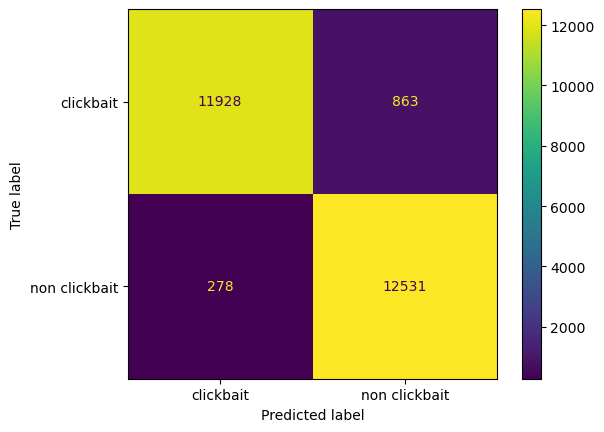

In [6]:
#Training Confusion Matrix
ConfusionMatrixDisplay.from_estimator(mlp_classifier, X_train, y_train, labels=['clickbait', 'non clickbait'])

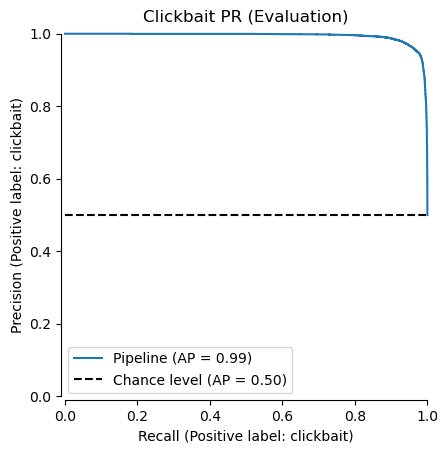

In [7]:
disp = PrecisionRecallDisplay.from_estimator(mlp_classifier, X_train, y_train, pos_label="clickbait", plot_chance_level=True, despine=True)
disp.ax_.set_title("Clickbait PR (Evaluation)")
plt.show()

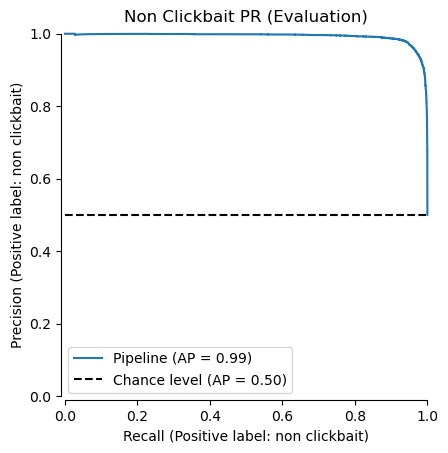

In [8]:
disp = PrecisionRecallDisplay.from_estimator(mlp_classifier, X_train, y_train, pos_label="non clickbait", plot_chance_level=True, despine=True)
disp.ax_.set_title("Non Clickbait PR (Evaluation)")
plt.show()

<h4><strong><u>Findings From 'Model Evaluation' Phase</u></strong></h4>
In the evaluation of my selected model, I found positive results for all evaluation methods. I believe that the overall shape of the learning curve is good. The training and the validation curves are diverging towards each other which suggests that the model is prioritizing the general logic of the dataset over being completely accurate. The 'cross_val_score' function evaluation results reinforced the learning curve values. In addition, the Confusion Matrix and the Precision-Recall plots show good results. As a result, I will move forward with this model to the 'Model Testing' section.

<h2><strong><u>Model Testing</u></strong></h2>

<h3><strong><u>Performance Metrics</u></strong></h3>

In [13]:
for key, value in clf_metrics.items():
    print(f"{key}")
    log_test_values = cross_val_score(mlp_classifier, X_test, y=y_test, scoring=value, cv=5)
    print(f"CV test Scores: ", log_test_values)
    np_log_test_values = np.array(log_test_values)
    average = np.mean(np_log_test_values)
    stDev = np.std(np_log_test_values)
    print(f"Average and Standard Error: ", "{:.2f}%".format(average.round(2)), "\u00B1", "{:.2f}%".format(stDev.round(4)*100), "\n")

Accuracy
CV test Scores:  [0.91875    0.925      0.91875    0.93671875 0.93828125]
Average and Standard Error:  0.93% ± 0.85% 

Precision
CV test Scores:  [0.94127243 0.94909688 0.94833333 0.9418239  0.95047923]
Average and Standard Error:  0.95% ± 0.39% 

Recall
CV test Scores:  [0.89875389 0.90342679 0.90809969 0.92199688 0.91887676]
Average and Standard Error:  0.91% ± 0.89% 

Negative Predictive Value
CV test Scores:  [0.89895988 0.91376702 0.89880952 0.93188854 0.92145015]
Average and Standard Error:  0.91% ± 1.29% 

Specificity
CV test Scores:  [0.94514107 0.94357367 0.95297806 0.94209703 0.94992175]
Average and Standard Error:  0.95% ± 0.41% 



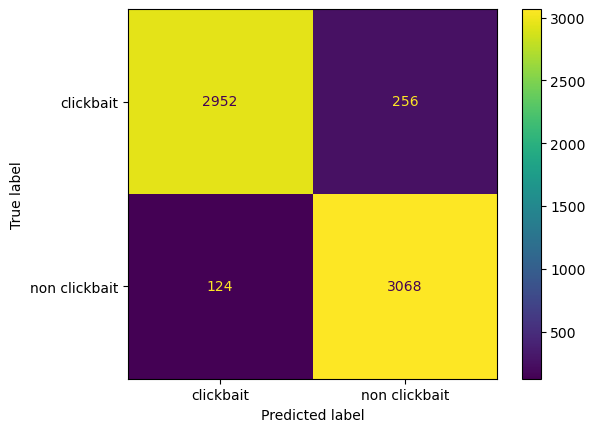

In [14]:
#Testing Confusion Matrix
mlp_test_predictions = mlp_classifier.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, mlp_test_predictions)

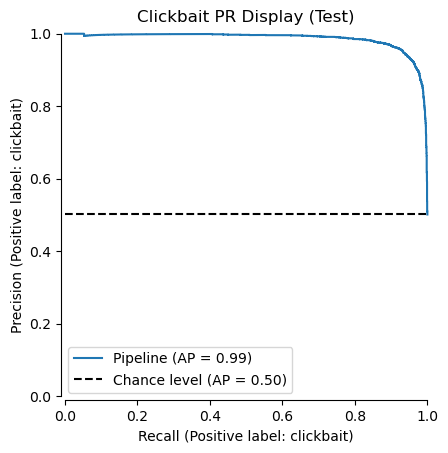

In [15]:
disp = PrecisionRecallDisplay.from_estimator(mlp_classifier, X_test, y_test, pos_label="clickbait", plot_chance_level=True, despine=True)
disp.ax_.set_title("Clickbait PR Display (Test)")
plt.show()

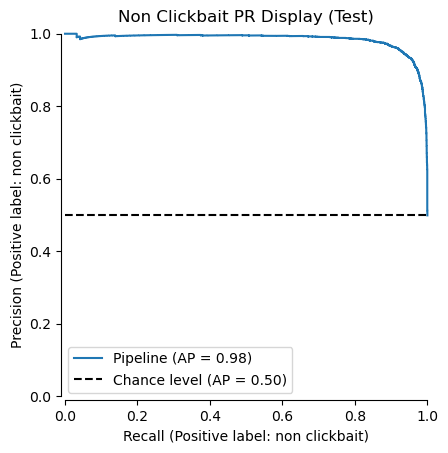

In [16]:
disp = PrecisionRecallDisplay.from_estimator(mlp_classifier, X_test, y_test, pos_label="non clickbait", plot_chance_level=True, despine=True)
disp.ax_.set_title("Non Clickbait PR Display (Test)")
plt.show()

<h4><strong><u>Findings From 'Model Testing' Phase</u></strong></h4>
In the testing phase of my selected model, I found that the testing results were good and in keeping with my results from the 'Model Evaluation' section. The 'cross_val_score' function evaluation results, Confusion Matrix display, and PR displays were all in keeping with the results from the 'Model Evaluation' section. 

<h2><strong><u>Conclusion</u></strong></h2>
Considering the results of the experiment, I believe this model can used for clickbait classification.